In [33]:
import requests
import json
from datetime import datetime
import matplotlib.pyplot as plt

In [34]:
# Download the dataset
url = "https://raw.githubusercontent.com/niranjanthiru/covid_cases_vaccination/855fd25e68f50b009f7ed88252fa3e4e70b54dfb/covid_19_data.json"
response = requests.get(url)
data = response.json()

In [35]:
# Filter countries with more than 5,000,000 confirmed cases by 29th May 2021
high_cases_countries = [country for country in data if country["Confirmed"] > 5000000 and country["ObservationDate"] == "05/29/2021"]


In [36]:
# the state/country with the most number of recoveries on a day
most_recoveries_country = max(data, key=lambda x: x["Recovered"])

In [37]:
# Extract the timeline of the number of cases per day by state/country
timeline = {}
for country in data:
    date = datetime.strptime(country["ObservationDate"], "%m/%d/%Y")
    if date in timeline:
        timeline[date].append(country)
    else:
        timeline[date] = [country]


In [38]:
# status timeline
status_timeline = {}
for date, countries in timeline.items():
    status_timeline[date] = {}
    for country in countries:
        if country["Confirmed"] > 500000:
            status = "red"
        elif country["Confirmed"] > 100000:
            status = "orange"
        elif country["Confirmed"] > 10000:
            status = "yellow"
        else:
            status = "green"
        status_timeline[date][country["Country"]] = status


In [39]:
# Display the information
print("Countries with more than 5,000,000 confirmed cases by 29th May 2021:")
for country in high_cases_countries:
    print(country["Country"])

print("\nState/Country with the most number of recoveries on a day:")
print(most_recoveries_country["Country"])



Countries with more than 5,000,000 confirmed cases by 29th May 2021:
France
Turkey
India

State/Country with the most number of recoveries on a day:
India


In [40]:
print("\nTimeline of the number of cases per day (not cumulative) by country:")
for date, countries in timeline.items():
    print(f"{date.strftime('%m/%d/%Y')}:")
    for country in countries:
        print(f"{country['Country']}: {country['Confirmed']} cases")




Timeline of the number of cases per day (not cumulative) by country:
01/01/2021:
Afghanistan: 51526 cases
Albania: 58316 cases
Algeria: 99897 cases
Andorra: 8117 cases
Angola: 17568 cases
Antigua and Barbuda: 159 cases
Argentina: 1629594 cases
Armenia: 159738 cases
Austria: 362911 cases
Azerbaijan: 219041 cases
Bahamas: 7887 cases
Bahrain: 92913 cases
Bangladesh: 514500 cases
Barbados: 395 cases
Belarus: 196223 cases
Belize: 10776 cases
Benin: 3251 cases
Bhutan: 689 cases
Bolivia: 160985 cases
Bosnia and Herzegovina: 112143 cases
Botswana: 14805 cases
Brunei: 157 cases
Bulgaria: 202540 cases
Burkina Faso: 6828 cases
Burma: 125042 cases
Burundi: 822 cases
Cabo Verde: 11872 cases
Cambodia: 379 cases
Cameroon: 26848 cases
Central African Republic: 4963 cases
Chad: 2141 cases
Comoros: 823 cases
Congo (Brazzaville): 7107 cases
Congo (Kinshasa): 17849 cases
Costa Rica: 169321 cases
Croatia: 212007 cases
Cuba: 12056 cases
Cyprus: 22818 cases
Czech Republic: 732022 cases
Denmark: 165930 cases

In [41]:
print("\nTimeline of the status of the countries:")
for date, countries in status_timeline.items():
    print(f"{date.strftime('%m/%d/%Y')}:")
    for country, status in countries.items():
        print(f"{country}: {status}")


Timeline of the status of the countries:
01/01/2021:
Afghanistan: yellow
Albania: yellow
Algeria: yellow
Andorra: green
Angola: yellow
Antigua and Barbuda: green
Argentina: red
Armenia: orange
Austria: orange
Azerbaijan: orange
Bahamas: green
Bahrain: yellow
Bangladesh: red
Barbados: green
Belarus: orange
Belize: yellow
Benin: green
Bhutan: green
Bolivia: orange
Bosnia and Herzegovina: orange
Botswana: yellow
Brunei: green
Bulgaria: orange
Burkina Faso: green
Burma: orange
Burundi: green
Cabo Verde: yellow
Cambodia: green
Cameroon: yellow
Central African Republic: green
Chad: green
Comoros: green
Congo (Brazzaville): green
Congo (Kinshasa): yellow
Costa Rica: orange
Croatia: orange
Cuba: yellow
Cyprus: yellow
Czech Republic: red
Denmark: green
Diamond Princess: green
Djibouti: green
Dominica: green
Dominican Republic: orange
Ecuador: orange
Egypt: orange
El Salvador: yellow
Equatorial Guinea: green
Eritrea: green
Estonia: yellow
Eswatini: green
Ethiopia: orange
Fiji: green
Finland: ye

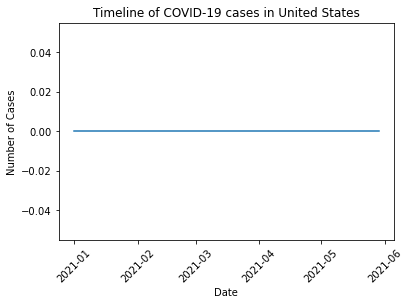

In [42]:
# Plotting the timeline of the number of cases per day (not cumulative) for a specific country
country_name = "United States"
dates = [date for date in timeline.keys()]
cases = [next((country["Confirmed"] for country in countries if country["Country"] == country_name), 0) for countries in timeline.values()]

plt.plot(dates, cases)
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.title(f"Timeline of COVID-19 cases in {country_name}")
plt.xticks(rotation=45)
plt.show()


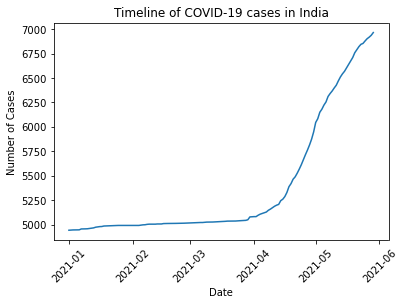

In [43]:
# Plotting the timeline of the number of cases per day (not cumulative) for a specific country
country_name = "India"
dates = sorted(timeline.keys())
cases = [next((country["Confirmed"] for country in timeline[date] if country["Country"] == country_name), 0) for date in dates]

plt.plot(dates, cases)
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.title(f"Timeline of COVID-19 cases in {country_name}")
plt.xticks(rotation=45)
plt.show()